# COMP-2704: Final Project
# Use Case and Data Selection
## Author: Jerome Geronimo (#0397026)

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the dataset to a Pandas dataframe named data
data = pd.read_csv('predictive_maintenance.csv', index_col=0)
data

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
UID,,,,,,,,,
1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...
9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure


## Features description

The dataset consists of 10,000 data points stored as rows with features and labels in columns

| Feature        | Description |
| -------------- | ------- |
| **UID**        | Unique identifier ranging from 1 to 10000    |
| **Product ID** | ID consisting of a letter L, M, or H for low , medium, and high as product quality variants and a variant-specific serial number     |
| **Type**    | Product quality variants: (L)ow, (M)edium, or (H)igh quality    |
| **Air temperature [K]**    | Ambient temperature surrounding the machinery or equipment being monitored    |
| **Process temperature [K]**    | Temperature of the substances or materials being processed within the machinery or equipment    |
| **Rotational speed [rpm]**    | Speed at which a machine's components or parts rotate during operation    |
| **Torque [Nm]**    | Rotational force exerted by a machine's components    |
| **Tool wear [min]**    | The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process    |
| **Target**    | Indicates whether the machine failed (1) or not (0)    |
| **Failure type**    | See below   |

The machine failure consists of five independent failure modes:

- **Tool wear failure (TWF)**: The dataset simulates tool wear by randomly selecting data points with tool wear time between 200-240 mins. 120 data points are selected, where tools were replaced and failed 45 times.
- **Heat dissipation failure (HDF)**: Heat dissipation causes a process failure. The dataset simulates HDF by labeling data points as Failed when the difference between air and process temperature is below 8.6 K and the tool's rotational speed is below 1380 rpm. This is the case for 112 data points.
- **Power failure (PWF)**: The dataset simulates the power required for the process by calculating the product of torque and rotational speed (in rad/s). If this power is below 3500 W or above 9000 W, the process fails, which is the case for 95 of the data points.
- **Overstrain failure (OSF)**: The dataset simulates OSF by labeling data points as Failed when the product of tool wear and torque exceeds 11,000 min*Nm for the L product variant (12,000 M, 13,000 H). This is true for 78 data points.
- **Random failures (RNF)**: each process has a chance of 0.1 % to fail regardless of its process parameters. This is the case for 18 datapoints.

Reference:  
[Machine Predictive Maintenance Classification](https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification/data)  
[AI4I 2020 Predictive Maintenance Dataset](https://archive.ics.uci.edu/dataset/601/ai4i+2020+predictive+maintenance+dataset)

## Use case

Since real predictive maintenance datasets are generally difficult to obtain, this dataset from Kaggle provides a synthetic dataset that tries to reflect real predictive maintenance encountered in the industry, as best as possible.

The dataset classifies different products whether they failed or not based on different parameters such as Temperature, Rotational speed, and Torque, among others. The data points are labeled as one of the following classes:
- No Failure
- Power Failure
- Tool Wear Failure
- Overstrain Failure
- Random Failures
- Heat Dissipation Failure

For companies operating heavy machinery, maintaining equipment is essential to ensuring optimal performance and reliability while minimizing maintenance costs. Regular diagnostics and check-ups play a crucial role in this process, helping to identify potential issues early on.

Using machine learning, companies can monitor equipment condition, detect faults in advance, and optimize maintenance schedules. By analyzing patterns and trends in equipment performance data, AI algorithms can predict when maintenance is needed, allowing for proactive actions to prevent costly downtime and service disruptions.

A practical application for this classifier can be demonstrated in an automotive parts manufacturing facility. The automated production of various car components, driven by high demand, consistently places substantial stress on the machinery. To address this, sensors can be integrated into all machinery to collect the data mentioned earlier. This data is transmitted daily to a central system, where automated algorithms using the classifier analyze these metrics on a weekly or monthly basis to identify potential machine failures, or validate optimal operating conditions. This would improve operational efficiency and increased profits, by proactively identifying machines that may disrupt the manufacturing process, thereby preventing potential breakdowns or interruptions that could incur significant costs.

## Discussion of prediction errors

For this use case, a false positive for the 'No Failure' class has great consequences. Predicting a 'No Failure' for a machine that has actually failed is highly disastrous, as it can lead to a halt in operations and disrupt services. Conversely, a false negative for the 'No Failure' class, though it may require additional resources for inspection, is comparatively less critical.

## Data cleaning

### Checking data types

Let's take a look at our dataset below. We see that all columns are numeric except for ProductID, Type and Failure Type. This means that our dataset has correct data types and we don't need to adjust them.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product ID               10000 non-null  object 
 1   Type                     10000 non-null  object 
 2   Air temperature [K]      10000 non-null  float64
 3   Process temperature [K]  10000 non-null  float64
 4   Rotational speed [rpm]   10000 non-null  int64  
 5   Torque [Nm]              10000 non-null  float64
 6   Tool wear [min]          10000 non-null  int64  
 7   Target                   10000 non-null  int64  
 8   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(3), object(3)
memory usage: 781.2+ KB


### Removing unnecessary columns

The Target column indicates whether the product failed or not. However, the Failure Type column already indicates whether the device failed or not (No Failure vs other failure types). Thus, we need to remove the Target column as it's not anymore relevant to training our model.

In [5]:
# Drops the Target column
data.drop('Target', axis=1, inplace=True)
data.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
UID,,,,,,,,
1,M14860,M,298.1,308.6,1551,42.8,0,No Failure
2,L47181,L,298.2,308.7,1408,46.3,3,No Failure
3,L47182,L,298.1,308.5,1498,49.4,5,No Failure
4,L47183,L,298.2,308.6,1433,39.5,7,No Failure
5,L47184,L,298.2,308.7,1408,40.0,9,No Failure


### Feature rescaling

The following code rescales the feature values using Scikit-learn's StandardScaler. Rescaling the values ensures that all features contribute equally to the model and prevents larger-valued features from overpowering the others.

In [6]:
from sklearn.preprocessing import StandardScaler

# Create a standard scaler object
std_scaler = StandardScaler()

# Collect the numeric columns
num_columns = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

# Copies the data frame to a new variable
df_scaled = data.copy()

# Scale the numeric values in the dataframe
df_scaled[num_columns] = std_scaler.fit_transform(df_scaled[num_columns])
display(df_scaled)

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
UID,,,,,,,,
1,M14860,M,-0.952389,-0.947360,0.068185,0.282200,-1.695984,No Failure
2,L47181,L,-0.902393,-0.879959,-0.729472,0.633308,-1.648852,No Failure
3,L47182,L,-0.952389,-1.014761,-0.227450,0.944290,-1.617430,No Failure
4,L47183,L,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009,No Failure
5,L47184,L,-0.902393,-0.879959,-0.729472,0.001313,-1.554588,No Failure
...,...,...,...,...,...,...,...,...
9996,M24855,M,-0.602417,-1.082162,0.363820,-1.052012,-1.476034,No Failure
9997,H39410,H,-0.552421,-1.082162,0.520005,-0.821283,-1.428902,No Failure
9998,M24857,M,-0.502425,-0.947360,0.592519,-0.660777,-1.350349,No Failure


In [7]:
# Save the cleaned data to a CSV file
df_scaled.to_csv('cleaned_data.csv', mode='w')

Aside from the changes above, the dataset is clean enough and ready for the next phase. Columns have the correct data types and do not need any further preprocessing.

## Statistical or categorical description

In [8]:
# Descriptive statistics of the original dataset
data.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000
std,2.000259,1.483734,179.284096,9.968934,63.654147
min,295.300000,305.700000,1168.000000,3.800000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000


In [9]:
# Descriptive statistics of the scaled dataset
df_scaled.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,-9.322321e-16,-1.693934e-15,-2.330580e-16,5.424994e-16,1.051603e-16
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-2.352278e+00,-2.901986e+00,-2.068196e+00,-3.630149e+00,-1.695984e+00
25%,-8.523974e-01,-8.125581e-01,-6.458012e-01,-6.808401e-01,-8.633176e-01
50%,4.753123e-02,6.365340e-02,-1.995597e-01,1.134481e-02,7.698234e-04
75%,7.474757e-01,7.376623e-01,4.084443e-01,6.834663e-01,8.491466e-01
max,2.247357e+00,2.557486e+00,7.514840e+00,3.672902e+00,2.278819e+00


Scaling the data values provide a better view and comparison of the features' distributions.

Almost all of the features have approximately normal distributions, except for Rotational speed \[rpm] and Tool wear \[min].

Rotational speed \[rpm] is skewed to the right, and Tool wear \[min] has a more equal distribution compared to the rest of the features.

<Axes: ylabel='Count'>

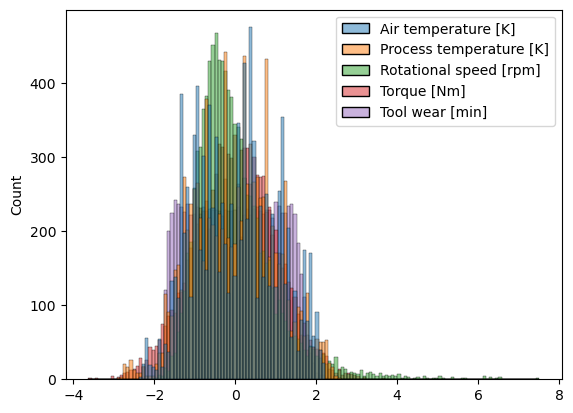

In [10]:
sns.histplot(data=df_scaled)

<Axes: xlabel='Air temperature [K]', ylabel='Count'>

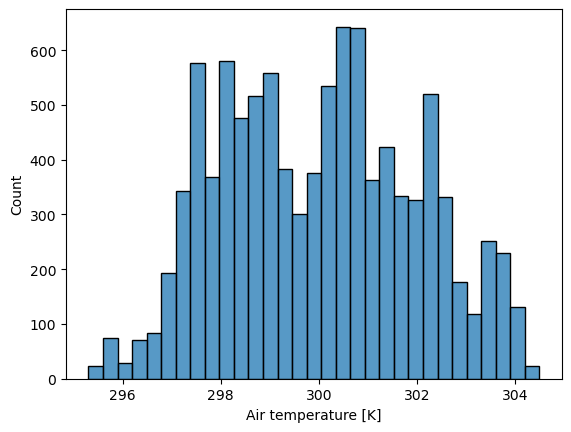

In [11]:
sns.histplot(data=data, x='Air temperature [K]')

<Axes: xlabel='Air temperature [K]', ylabel='Count'>

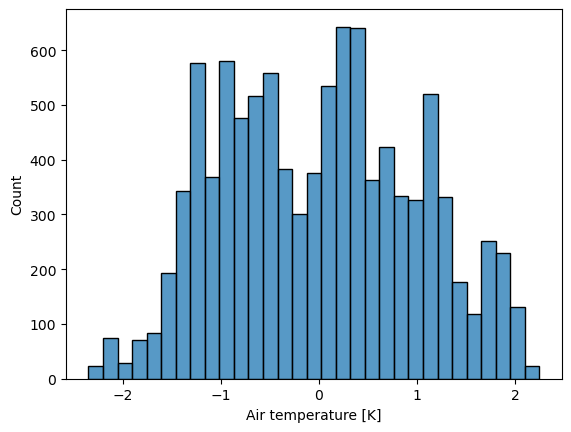

In [12]:
sns.histplot(data=df_scaled, x='Air temperature [K]')

<Axes: xlabel='Rotational speed [rpm]', ylabel='Count'>

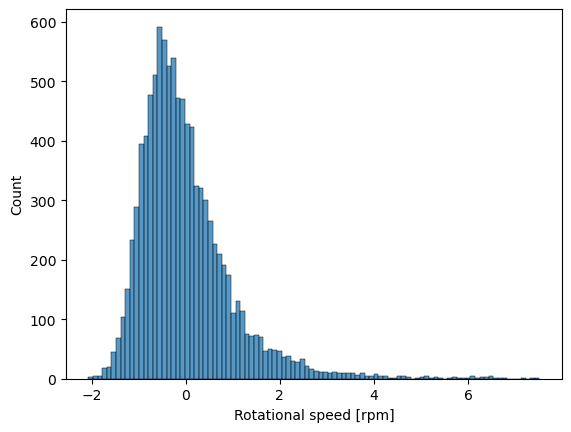

In [13]:
sns.histplot(data=df_scaled, x='Rotational speed [rpm]')

<Axes: xlabel='Torque [Nm]', ylabel='Count'>

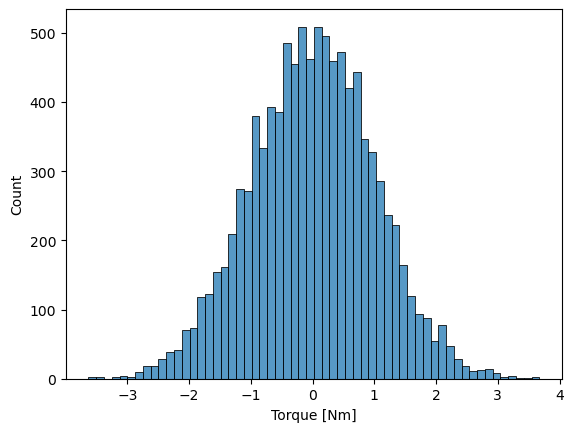

In [14]:
sns.histplot(data=df_scaled, x='Torque [Nm]')

<Axes: xlabel='Tool wear [min]', ylabel='Count'>

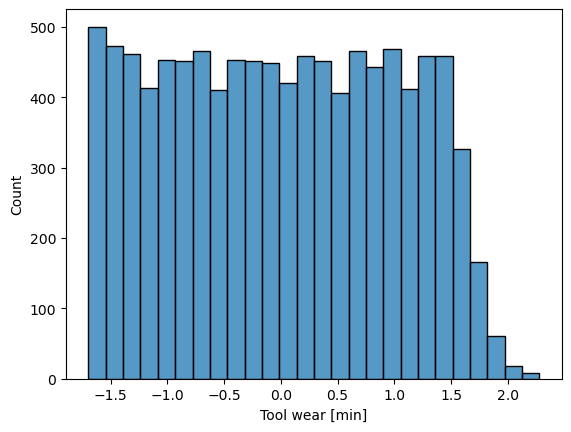

In [15]:
sns.histplot(data=df_scaled, x='Tool wear [min]')

## Describe class distribution

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'No Failure'),
  Text(1, 0, 'Power Failure'),
  Text(2, 0, 'Tool Wear Failure'),
  Text(3, 0, 'Overstrain Failure'),
  Text(4, 0, 'Random Failures'),
  Text(5, 0, 'Heat Dissipation Failure')])

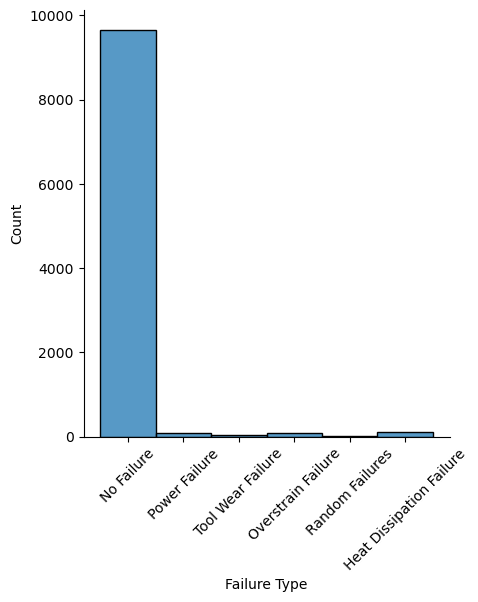

In [16]:
sns.displot(df_scaled, x='Failure Type')
plt.xticks(rotation=45)

In this dataset, there are 9652 / 10000 data points that have negative labels (No Failure). This means that the positively-labeled dataset is undersampled.

According to the depicted plot, it is evident that failures represent only a very minor fraction of the dataset.

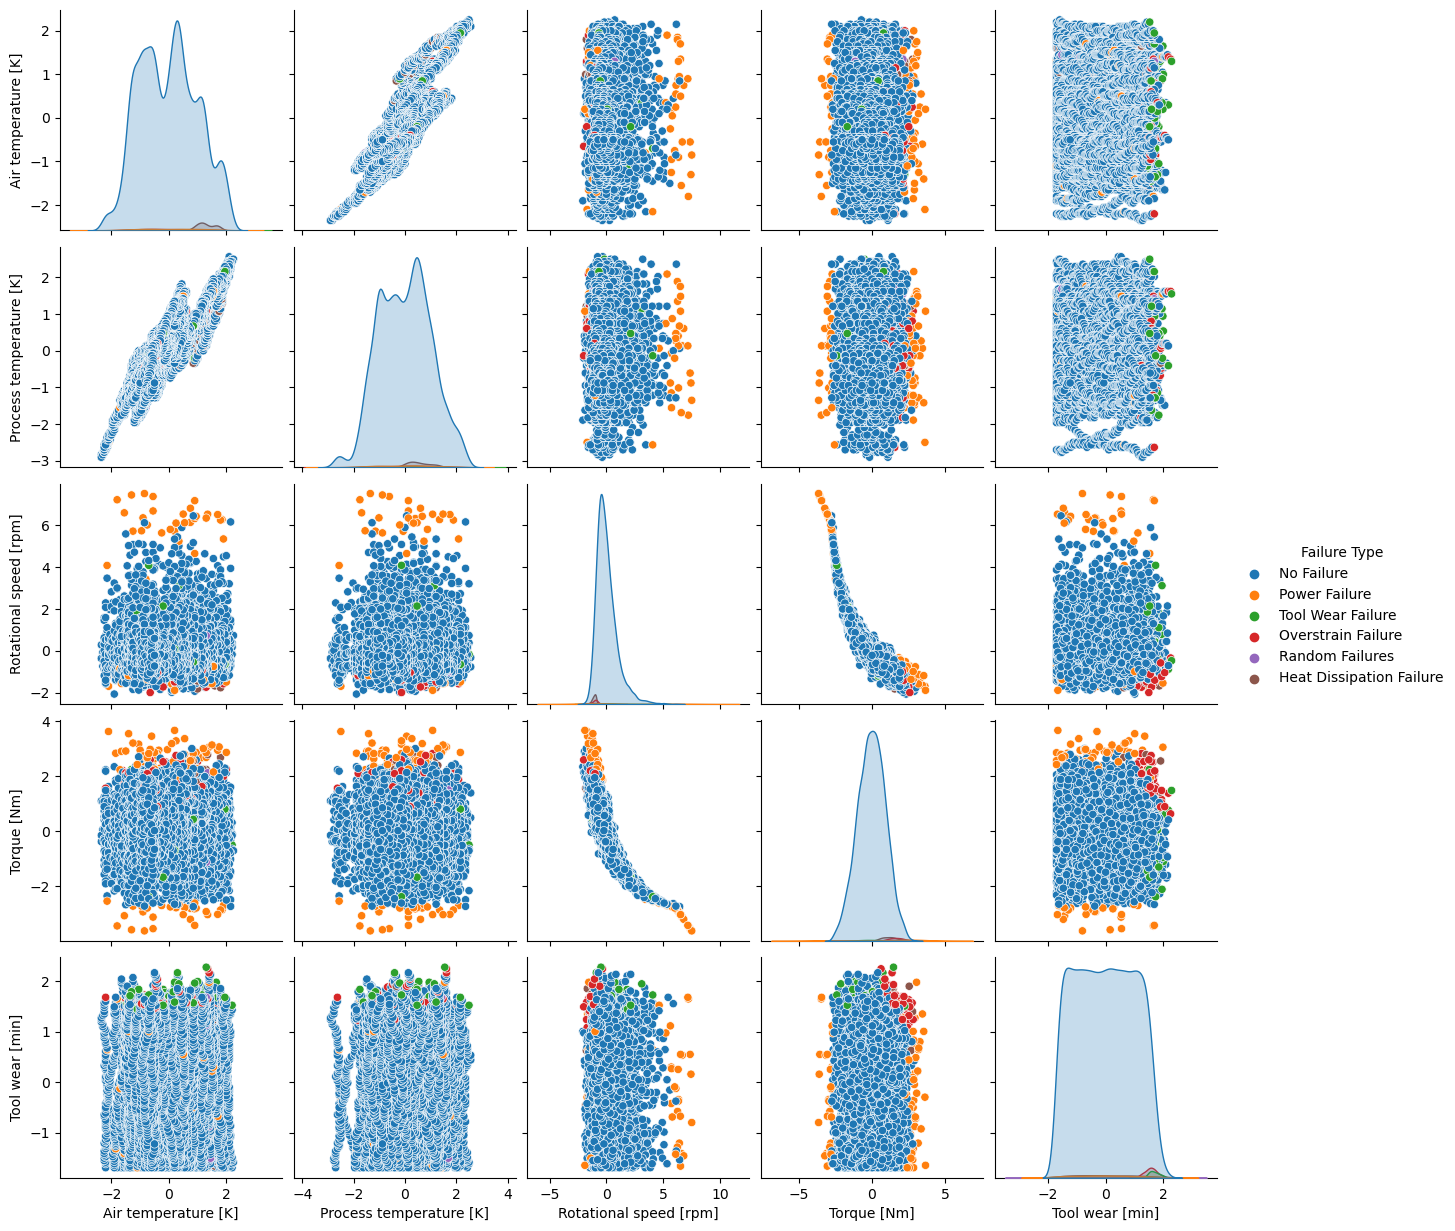

In [17]:
sns.pairplot(df_scaled, hue='Failure Type')

The plots above further emphasize the observation that failures(colored dots) are significantly underrepresented in this dataset.

The code block below demonstrates dataset resampling aimed at increasing the number of failure data points. By using the RandomOverSampler class from the imblearn library, I balanced the dataset to ensure equal representation of all failure types. However, this approach is overly simplistic and would benefit from a more strategic oversampling strategy.

In [18]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Drops the Label column from the dataset
x = df_scaled.drop('Failure Type', axis=1)
# Extracts the Label column from the dataset
y = df_scaled['Failure Type']
# Creates a random oversampler from the imblearn library
ros = RandomOverSampler(random_state=0)
# Oversamples the dataset to increase the number of failure data points
X_resampled, y_resampled = ros.fit_resample(x, y)
# Displays the new counts for each failure type
y_resampled.value_counts()

Failure Type
No Failure                  9652
Power Failure               9652
Tool Wear Failure           9652
Overstrain Failure          9652
Random Failures             9652
Heat Dissipation Failure    9652
Name: count, dtype: int64

In [19]:
# Create a new dataframe from the resampled data
resampled_data = pd.concat([X_resampled, y_resampled], axis=1)
# Save the resampled data to a CSV file
resampled_data.to_csv('resampled_data.csv', mode='w')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'No Failure'),
  Text(1, 0, 'Power Failure'),
  Text(2, 0, 'Tool Wear Failure'),
  Text(3, 0, 'Overstrain Failure'),
  Text(4, 0, 'Random Failures'),
  Text(5, 0, 'Heat Dissipation Failure')])

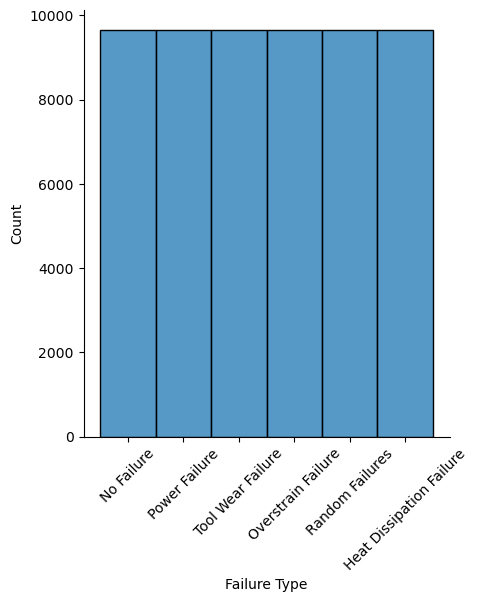

In [20]:
# Plot the distribution of the Failure Types
sns.displot(resampled_data, x='Failure Type')
plt.xticks(rotation=45)

Finally, we can see that the dataset has equal distribution of the failure types to allow for improved model training.

The plots below show a better distribution of data points in the resampled dataset.

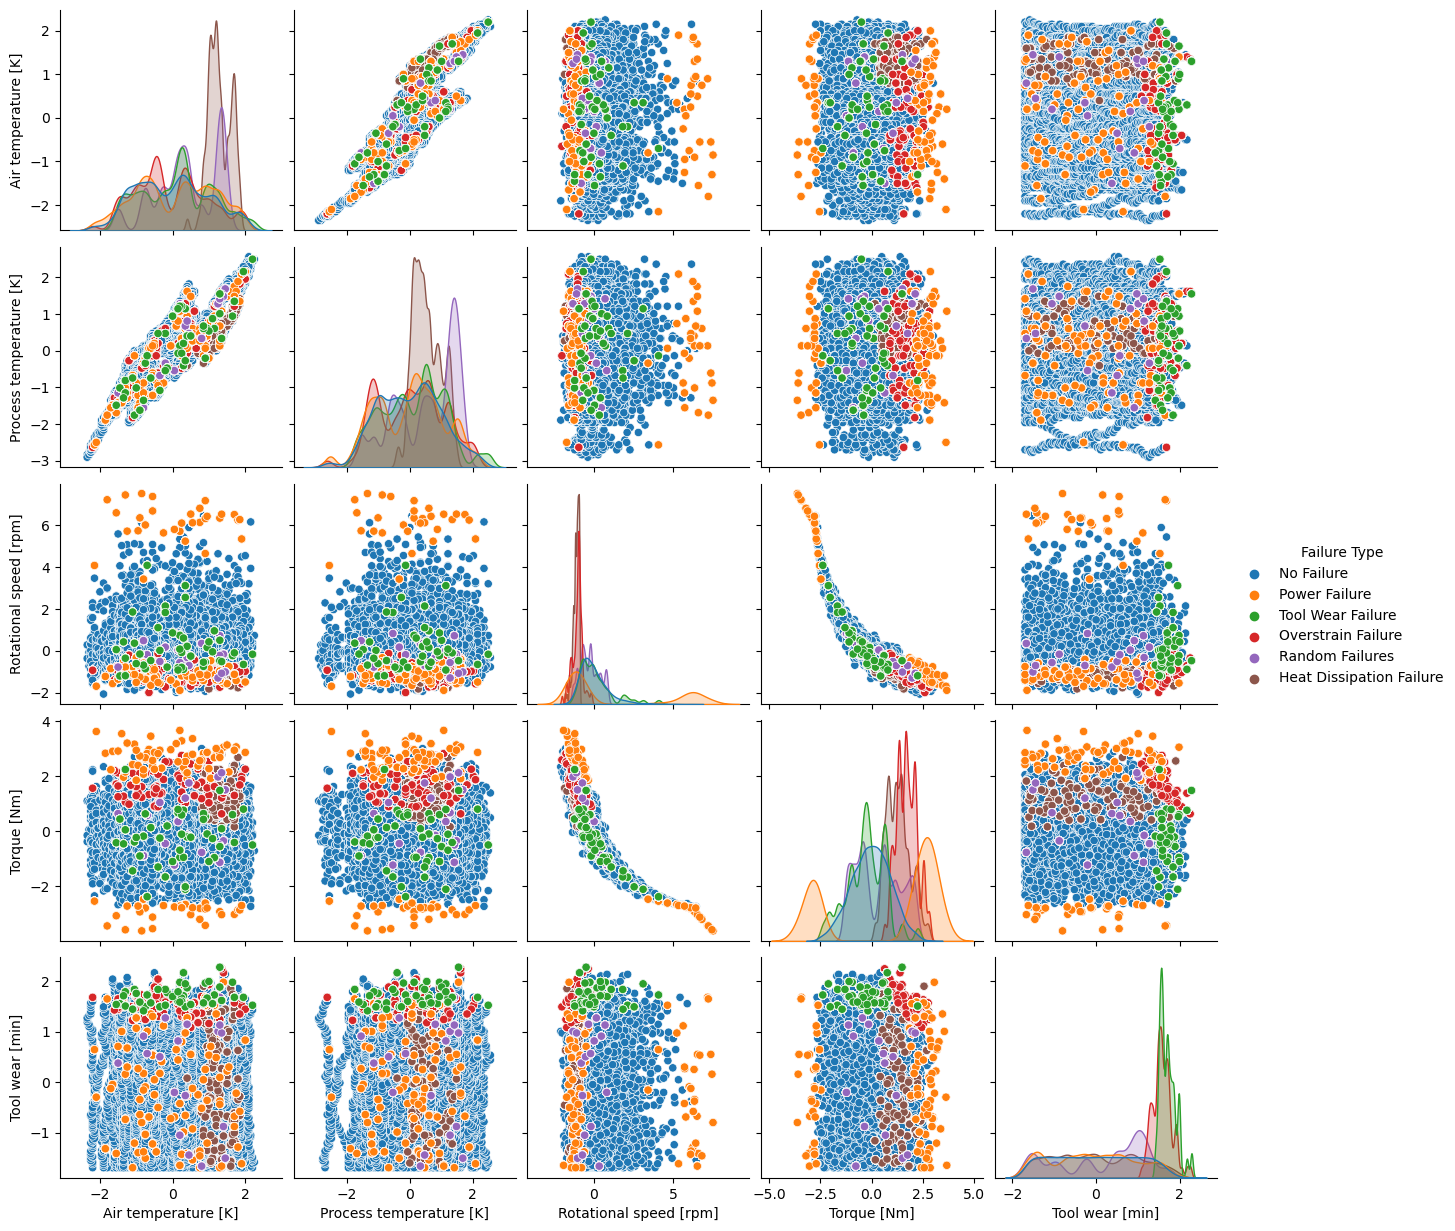

In [21]:
sns.pairplot(resampled_data, hue='Failure Type')